src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [72]:
import tensorflow as tf

In [73]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [74]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [75]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2182 files belonging to 22 classes.


In [77]:
data_iterator = data.as_numpy_iterator()

In [78]:
batch = data_iterator.next()

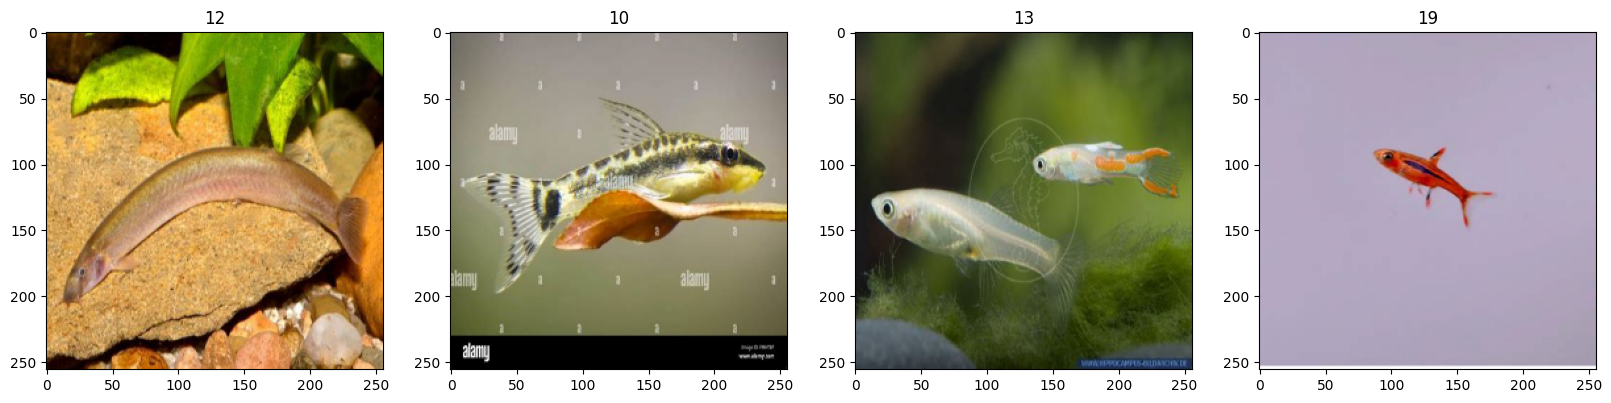

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [80]:
data = data.map(lambda x,y: (x/255, y))

In [81]:
data.as_numpy_iterator().next()

(array([[[[0.25862786, 0.25862786, 0.15666707],
          [0.2547745 , 0.2547745 , 0.15281372],
          [0.25092116, 0.25092116, 0.14896037],
          ...,
          [0.35193014, 0.4068321 , 0.16369486],
          [0.3596967 , 0.41459864, 0.1714614 ],
          [0.38777575, 0.4426777 , 0.19954044]],
 
         [[0.25636214, 0.25636214, 0.15440135],
          [0.25381434, 0.25381434, 0.15185355],
          [0.24927393, 0.24927393, 0.14731313],
          ...,
          [0.35055146, 0.40545344, 0.16231617],
          [0.358318  , 0.41322   , 0.17008272],
          [0.38293505, 0.437837  , 0.19469975]],
 
         [[0.25490198, 0.25490198, 0.15294118],
          [0.2521538 , 0.2521538 , 0.15019304],
          [0.24705882, 0.24705882, 0.14509805],
          ...,
          [0.34800857, 0.40291053, 0.15977329],
          [0.35577512, 0.41067708, 0.16753983],
          [0.37809438, 0.43299633, 0.18985906]],
 
         ...,
 
         [[0.04161879, 0.04161879, 0.08083449],
          [0.05276

# Split Data

In [82]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [83]:
train_size

48

In [84]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [85]:
train_images = []
train_labels = []

In [86]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

In [87]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [88]:
val_images = []
val_labels = []

In [89]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 2, 13,  6, 10,  2,  8, 10, 20, 11, 19, 14,  8, 21,  3, 19, 13,  6,
        2,  8, 17, 21, 11,  8, 20,  1, 13, 17, 11,  0,  8, 15,  5],
      dtype=int32), array([16, 17,  9,  3,  0,  1,  2, 20, 14, 21,  1, 11, 13,  0, 10,  1, 21,
       18,  7, 12,  4,  0,  7,  4, 15, 11, 10, 18,  9,  4, 21, 13],
      dtype=int32), array([12, 21,  6, 15, 12,  1, 13, 17, 19, 12, 19, 14, 11, 16,  5,  9, 14,
        8, 21, 20, 21, 15, 11, 11, 10, 10,  8,  0, 11, 21, 20,  0],
      dtype=int32), array([ 0, 13,  6,  8, 17,  0,  0, 16,  8, 15,  8, 12, 21, 21, 16, 19,  3,
        0,  0, 13, 21, 10, 12,  8, 12, 16,  2,  2,  1,  3,  5, 16],
      dtype=int32), array([20,  2, 11,  7,  3,  8, 20,  6, 20, 12,  4, 12,  0,  0, 14, 16, 11,
       21, 11,  9, 20, 13, 10, 20,  3, 10,  5, 14,  3,  4,  9,  4],
      dtype=int32), array([ 0,  1, 10,  6,  7, 18, 13,  7, 10,  6, 19, 11, 13,  0, 10, 10, 17,
        2, 14,  6, 12, 18,  9,  0,  7,  9,  3,  4,  4, 19, 17,  1],
      dt

2025-03-11 16:38:36.808942: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [90]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [91]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [93]:
model = Sequential()

In [94]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (1536, 256, 256, 3)
train_labels_one_hot shape: (1536, 22)
val_images shape: (416, 256, 256, 3)
val_labels_one_hot shape: (416, 22)


In [97]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [99]:
logdir='logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20


2025-03-11 16:38:37.762018: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1207959552 exceeds 10% of free system memory.


48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 382ms/step - accuracy: 0.0883 - loss: 3.0651 - val_accuracy: 0.1611 - val_loss: 2.7217
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 0.2157 - loss: 2.5035 - val_accuracy: 0.2668 - val_loss: 2.4430
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 375ms/step - accuracy: 0.3769 - loss: 1.9850 - val_accuracy: 0.3389 - val_loss: 2.2854
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.6039 - loss: 1.4205 - val_accuracy: 0.4255 - val_loss: 2.1673
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.7812 - loss: 0.8023 - val_accuracy: 0.4639 - val_loss: 2.4325
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.8891 - loss: 0.4010 - val_accuracy: 0.4832 - val_loss: 2.6050
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - accuracy: 0.9501 - loss: 0.2273 - val_accuracy: 0.4952 - val_loss: 2.7907
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.9767 - loss: 0.1109 - val_accuracy: 0.459

# Plot Performance

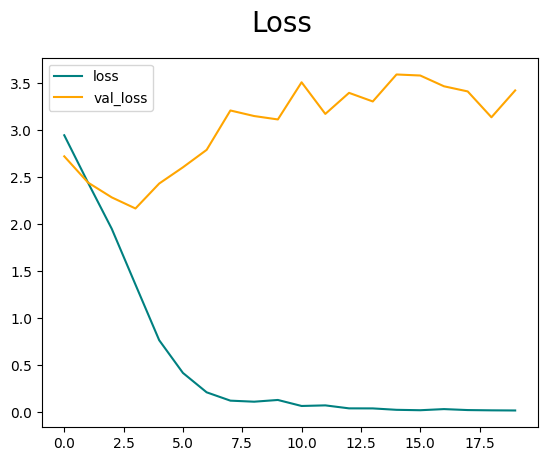

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

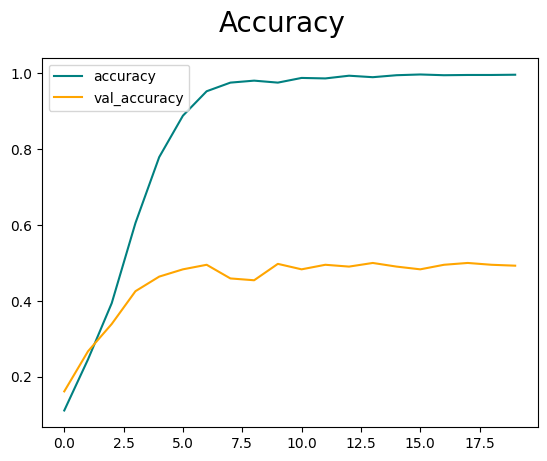

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [104]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [105]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [106]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Precision: 0.4743589758872986
Recall: 0.3854166567325592
Accuracy: 0.4322916567325592


# Test

In [113]:
import cv2

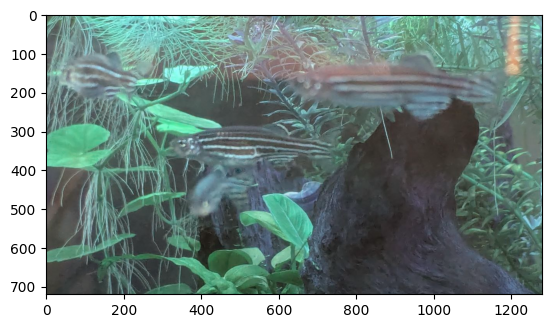

In [114]:
img = cv2.imread('test_pictures/Brachydanio.jpeg')
plt.imshow(img)
plt.show()

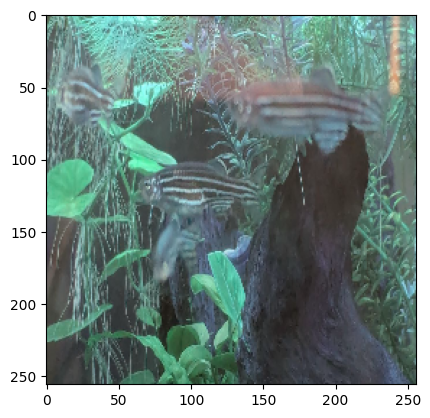

In [115]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [120]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [111]:
yhat

array([[4.4675469e-03, 9.2907000e-04, 7.8435568e-03, 3.7127785e-02,
        7.3298745e-02, 1.4323910e-01, 6.9625577e-04, 3.3111058e-04,
        3.5335661e-03, 3.0514438e-04, 1.5466937e-03, 1.1204035e-03,
        9.9370517e-03, 5.2927928e-05, 5.7322252e-01, 4.7980249e-03,
        2.2647346e-03, 7.6366350e-02, 4.0535298e-03, 1.8620071e-03,
        8.0930811e-05, 5.2923009e-02]], dtype=float32)

In [121]:
# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is: {class_names[predicted_class]}')

Predicted class is: Pterophyllum_scalare


# Save the Model